# Exploratory Data Analysis - Dataset Terrorism

## importing important libraries and modules

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("C:\\Users\\TAMANNA\\Downloads\\Global Terrorism - START data\\globalterrorismdb_0718dist.csv", encoding='ISO-8859-1',low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [3]:
df.shape

(181691, 135)

In [4]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

# Data Cleaning

## 1. Include only useful columns to dataframe

In [5]:
df = df[['iyear','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','gname','nkill']]
df.head()

,iyear,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,gname,nkill
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN


In [6]:
df.shape

(181691, 8)

In [7]:
df.columns

Index(['iyear', 'country_txt', 'region_txt', 'city', 'attacktype1_txt',
       'targtype1_txt', 'gname', 'nkill'],
      dtype='object')

In [8]:
# rename columns to better understand data columns
df.rename(columns= {'iyear':'year','country_txt':'country','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target','gname':'organization','nkill':'killed'},inplace=True)
df

,year,country,region,city,attack_type,target,organization,killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN
...,...,...,...,...,...,...,...,...
181686,2017,Somalia,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,Military,Al-Shabaab,1.0
181687,2017,Syria,Middle East & North Africa,Jableh,Bombing/Explosion,Military,Muslim extremists,2.0
181688,2017,Philippines,Southeast Asia,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),0.0
181689,2017,India,South Asia,Imphal,Bombing/Explosion,Government (General),Unknown,0.0


In [9]:
df.isnull().sum()

year                0
country             0
region              0
city              434
attack_type         0
target              0
organization        0
killed          10313
dtype: int64

## 2. Drop Null and Duplicate Values

In [10]:
df = df.dropna()  # drop null values

In [11]:
df.head()

,year,country,region,city,attack_type,target,organization,killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0
5,1970,United States,North America,Cairo,Armed Assault,Police,Black Nationalists,0.0
6,1970,Uruguay,South America,Montevideo,Assassination,Police,Tupamaros (Uruguay),0.0


In [12]:
df.isnull().sum()

year            0
country         0
region          0
city            0
attack_type     0
target          0
organization    0
killed          0
dtype: int64

In [13]:
df.dtypes

year              int64
country          object
region           object
city             object
attack_type      object
target           object
organization     object
killed          float64
dtype: object

In [14]:
df.head()

,year,country,region,city,attack_type,target,organization,killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0
5,1970,United States,North America,Cairo,Armed Assault,Police,Black Nationalists,0.0
6,1970,Uruguay,South America,Montevideo,Assassination,Police,Tupamaros (Uruguay),0.0


In [15]:
df = df.drop_duplicates()

## 3. Data Analysis on the basis of Kills

In [16]:
df.killed = df.killed.apply(lambda x: int(x))   
# change killed column datatype to int  , you can also use : df=df.astype({'killed':'int'})

In [17]:
df.sort_values(by=['killed'],ascending=False).head(10)

,year,country,region,city,attack_type,target,organization,killed
133518,2014,Iraq,Middle East & North Africa,Tikrit,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1570
73126,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1384
73127,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1383
55934,1994,Rwanda,Sub-Saharan Africa,Gikoro,Armed Assault,Private Citizens & Property,Hutu extremists,1180
136283,2014,Iraq,Middle East & North Africa,Sinjar,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),953
133225,2014,Iraq,Middle East & North Africa,Badush,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670
179671,2017,Somalia,Sub-Saharan Africa,Mogadishu,Bombing/Explosion,Business,Al-Shabaab,588
76347,2004,Nepal,South Asia,Dhading district,Armed Assault,Government (General),Communist Party of Nepal- Maoist (CPN-M),518
136746,2014,Syria,Middle East & North Africa,Unknown,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),517
170198,2016,Syria,Middle East & North Africa,Palmyra,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),433


In [18]:
df = df.drop([73126])

  * Top 10 attacks in countryies with maximum kills

## Iraq , United States and Rwanda are the countries with maximum kills 

In [19]:
df.sort_values(by=['killed'],ascending=False).head(10)

,year,country,region,city,attack_type,target,organization,killed
133518,2014,Iraq,Middle East & North Africa,Tikrit,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1570
73127,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1383
55934,1994,Rwanda,Sub-Saharan Africa,Gikoro,Armed Assault,Private Citizens & Property,Hutu extremists,1180
136283,2014,Iraq,Middle East & North Africa,Sinjar,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),953
133225,2014,Iraq,Middle East & North Africa,Badush,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670
179671,2017,Somalia,Sub-Saharan Africa,Mogadishu,Bombing/Explosion,Business,Al-Shabaab,588
76347,2004,Nepal,South Asia,Dhading district,Armed Assault,Government (General),Communist Party of Nepal- Maoist (CPN-M),518
136746,2014,Syria,Middle East & North Africa,Unknown,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),517
170198,2016,Syria,Middle East & North Africa,Palmyra,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),433
6629,1978,Iran,Middle East & North Africa,Abadan,Facility/Infrastructure Attack,Business,Mujahedin-e Khalq (MEK),422


In [20]:
df.describe()

,year,killed
count,132737.000000,132737.000000
mean,2003.097968,2.881284
std,12.877914,12.460286
min,1970.000000,0.000000
25%,1991.000000,0.000000
50%,2009.000000,1.000000
75%,2014.000000,2.000000
max,2017.000000,1570.000000


## Casualities in India

In [21]:
india = df[df.country=='India']
india

,year,country,region,city,attack_type,target,organization,killed
1186,1972,India,South Asia,New Delhi,Hijacking,Airports & Aircraft,Palestinians,0
2764,1975,India,South Asia,Samastipur,Bombing/Explosion,Government (General),Ananda Marga,4
3857,1976,India,South Asia,New Delhi,Bombing/Explosion,Airports & Aircraft,Unknown,0
5327,1977,India,South Asia,Bombay,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),0
7342,1979,India,South Asia,Imphal,Assassination,Government (General),Unknown,3
...,...,...,...,...,...,...,...,...
181661,2017,India,South Asia,Talacheru,Facility/Infrastructure Attack,Religious Figures/Institutions,Unknown,1
181663,2017,India,South Asia,Koothuparamba,Bombing/Explosion,Police,Unknown,0
181665,2017,India,South Asia,Toylanka,Facility/Infrastructure Attack,Business,Communist Party of India - Maoist (CPI-Maoist),0
181672,2017,India,South Asia,Lethapora,Armed Assault,Police,Jaish-e-Mohammad (JeM),8


In [22]:
india['killed'].sum()

18931

In [23]:
i = india.groupby(['city'],as_index=False).killed.sum()
i.sort_values('killed',ascending=False).head(10)

,city,killed
4542,Unknown,1371
4209,Srinagar,742
3073,Mumbai,474
90,Amritsar,370
3261,New Delhi,369
1822,Jammu,266
1060,Dantewada district,211
808,Chandigarh,191
2671,Ludhiana,161
1586,Guwahati,155


## Data Visualization

## 1. Region with casualities

* Middle east and North Africa, South Asia and  Sub- saharan Africa are the region with most casualities 

In [24]:
c1 = df.groupby(['region'],as_index=False)['killed'].sum()
c1.sort_values(by='killed',ascending=False)

,region,killed
5,Middle East & North Africa,120770
8,South Asia,97012
10,Sub-Saharan Africa,75659
1,Central America & Caribbean,28099
7,South America,27393
9,Southeast Asia,14734
4,Eastern Europe,7222
11,Western Europe,5899
6,North America,3422
3,East Asia,1119


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

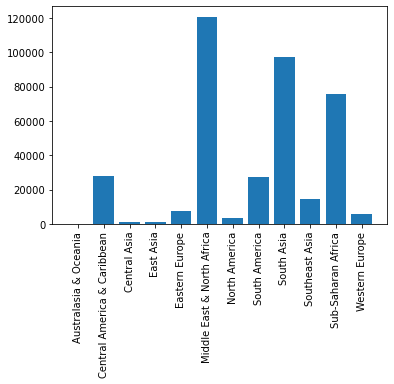

In [25]:
plt.bar(c1.region,c1.killed)
plt.xticks(rotation=90)

## 2. Casualities due to terrorism yearwise

* we can see that there is increase in deaths due to terrorism and near 2010 its on its peak.

In [26]:
r1 = df.groupby('year',as_index=False)['killed'].sum()
r1.sort_values(by='killed',ascending=False)

,year,killed
43,2014,40625
44,2015,34834
45,2016,31370
46,2017,25073
42,2013,19386
41,2012,14240
36,2007,11775
14,1984,10203
26,1997,10008
22,1992,9394


(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

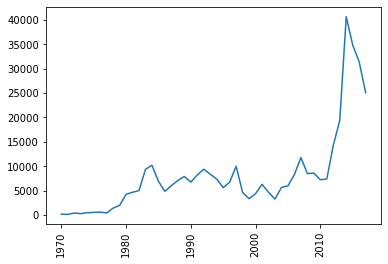

In [27]:
plt.plot(r1.year,r1.killed)
plt.xticks(rotation=90)

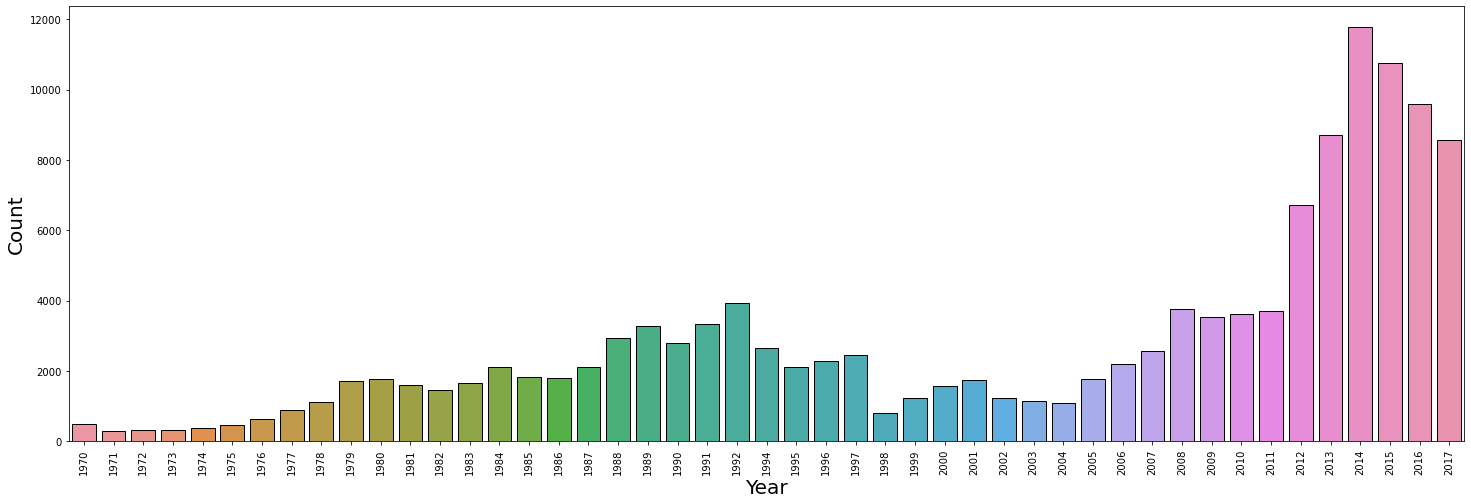

In [28]:
# year wise terrorist attack.
# 2014 is the year with maximum attacks
plt.subplots(figsize=(25,8))
sns.countplot(x='year', data=df,ec='black')
plt.xticks(rotation=90)
plt.xlabel("Year",fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

## 3. which is the most used attack-type by terrorist

**BombingExplosion,Armed Assault and Assassination are the most common attack types**

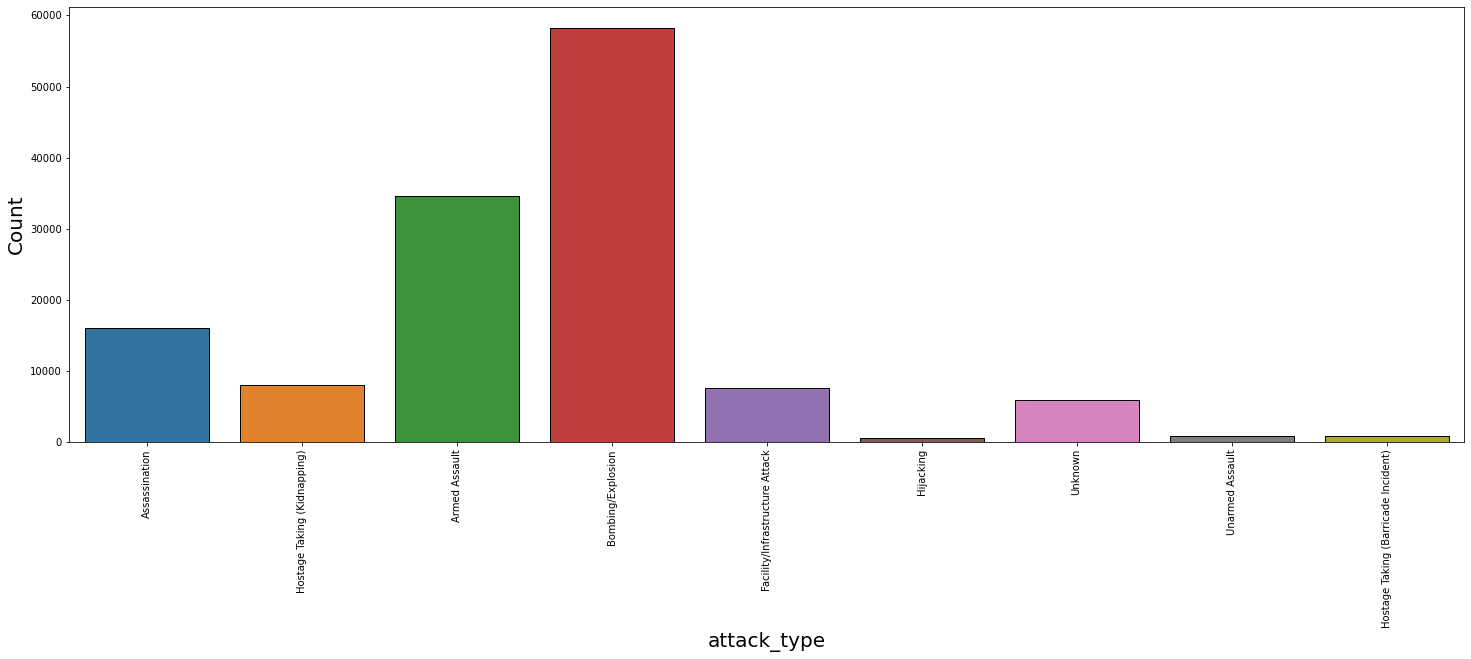

In [29]:
plt.subplots(figsize=(25,8))
sns.countplot(x='attack_type', data=df,ec='black')
plt.xticks(rotation=90)
plt.xlabel("attack_type",fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

## 4. Which kind of target they choose 
 - Private citizen and property, Military and Government(General) are mostly used as targets

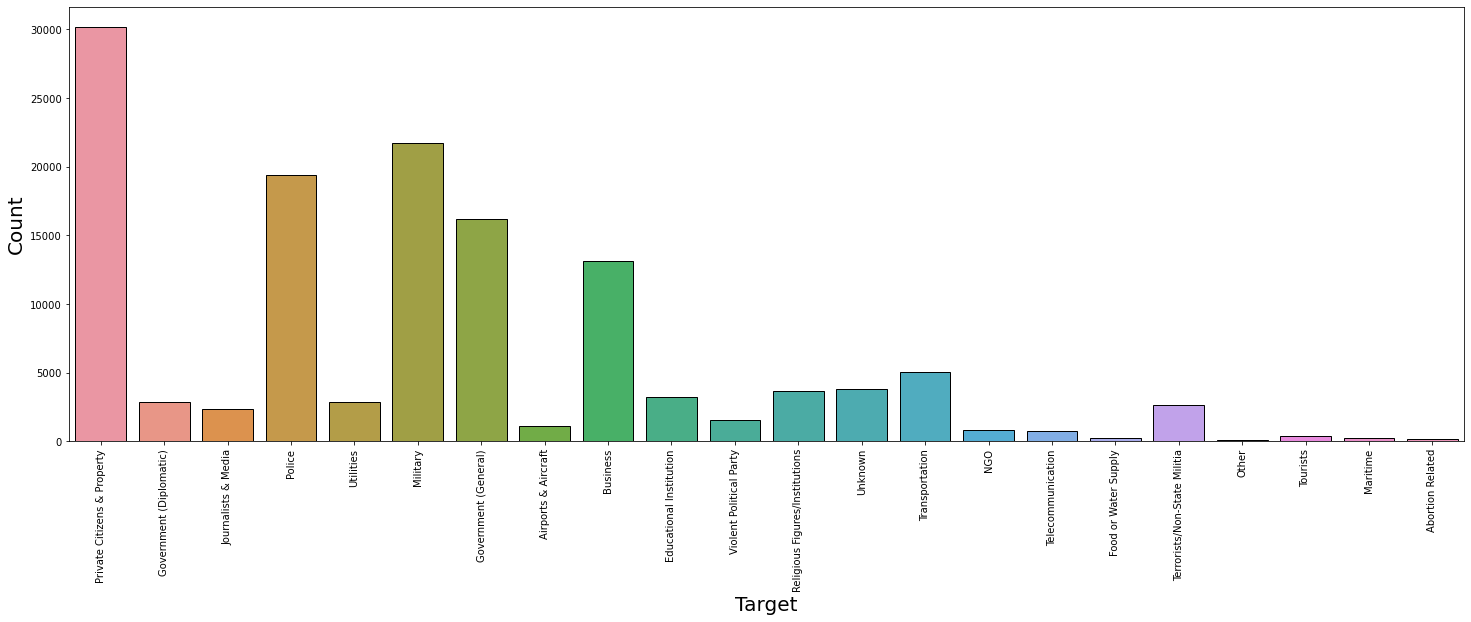

In [30]:
plt.subplots(figsize=(25,8))
sns.countplot(x='target', data=df,ec='black')
plt.xticks(rotation=90)
plt.xlabel("Target",fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()